# Loading Data Sets

In [1]:
! pip install kagglehub

In [3]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


# Check flickr8k Data Set 

In [6]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt

# Download the Flickr8K dataset using KaggleHub
path = kagglehub.dataset_download("shadabhussain/flickr8k")
print("Path to dataset files:", path)

Path to dataset files: /home/xw2641/.cache/kagglehub/datasets/shadabhussain/flickr8k/versions/3


In [7]:
import os

for root, dirs, files in os.walk(path):
    level = root.replace(path, '').count(os.sep)
    if level <= 1:  # Only show top-level and one level deeper
        indent = ' ' * 4 * level
        print(f"{indent}{os.path.basename(root)}/")
        subindent = ' ' * 4 * (level + 1)
        for d in dirs:
            print(f"{subindent}{d}/")


3/
    Flickr_Data/
    flickr_data/
    Flickr_Data/
        Flickr_Data/
    flickr_data/
        Flickr_Data/


In [8]:
# Load the captions data
captions_path = os.path.join(path, 'flickr_data/Flickr_Data/Flickr_TextData/Flickr8k.token.txt')
captions = pd.read_csv(captions_path, delimiter='\t', names=['image', 'caption'])

# Split the image filename and caption text
captions['image'] = captions['image'].apply(lambda x: x.split('#')[0])
print(captions.head())


# Number of unique images
print()
unique_images = captions['image'].nunique()
print(f"Number of unique images: {unique_images}")


# Total number of captions
total_captions = len(captions)
print(f"Total number of captions: {total_captions}")

                       image  \
0  1000268201_693b08cb0e.jpg   
1  1000268201_693b08cb0e.jpg   
2  1000268201_693b08cb0e.jpg   
3  1000268201_693b08cb0e.jpg   
4  1000268201_693b08cb0e.jpg   

                                             caption  
0  A child in a pink dress is climbing up a set o...  
1              A girl going into a wooden building .  
2   A little girl climbing into a wooden playhouse .  
3  A little girl climbing the stairs to her playh...  
4  A little girl in a pink dress going into a woo...  

Number of unique images: 8092
Total number of captions: 40460


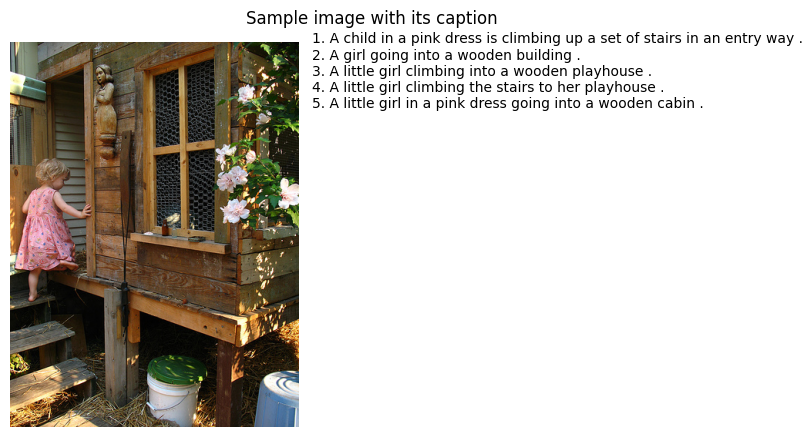

In [9]:
#a sample image with its caption
sample_image = os.path.join(path, 'Flickr_Data/Flickr_Data/Images/',captions['image'][0])
sample_captions = captions[captions['image'] == os.path.basename(sample_image)]['caption']

# Load and show the image
fig, ax = plt.subplots(figsize=(6, 5))
img = plt.imread(sample_image)
ax.imshow(img)
ax.axis('off')

plt.subplots_adjust(right=0.95)  # Adjust the main plot to leave space for captions
caption_ax = fig.add_axes([0.8, 0.1, 0.2, 0.8])  # [left, bottom, width, height]
caption_ax.axis('off')
caption_text = "\n".join([f"{idx + 1}. {caption}" for idx, caption in enumerate(sample_captions)])
caption_ax.text(0, 1, caption_text, va='top', fontsize=10)
plt.title("Sample image with its caption")

plt.show()

# Load dog breed Dataset

In [10]:
import kagglehub

# Download the Stanford Dogs dataset using KaggleHub
dog_dataset_path = kagglehub.dataset_download("jessicali9530/stanford-dogs-dataset")
print("Path to dog dataset files:", dog_dataset_path)


Path to dog dataset files: /home/xw2641/.cache/kagglehub/datasets/jessicali9530/stanford-dogs-dataset/versions/2


In [11]:
import os

# Define the path to the Stanford Dogs dataset (update this if necessary)
dog_dataset_path = os.path.join(dog_dataset_path, 'images')  # Adjusted to focus on the 'images' folder

# Print the structure of the Stanford Dogs dataset
for root, dirs, files in os.walk(dog_dataset_path):
    level = root.replace(dog_dataset_path, '').count(os.sep)
    if level <= 1:  # Only show top-level and one level deeper (breeds and images)
        indent = ' ' * 4 * level
        print(f"{indent}{os.path.basename(root)}/")
        subindent = ' ' * 4 * (level + 1)
        for d in dirs:
            print(f"{subindent}{d}/")


images/
    Images/
    Images/
        n02091635-otterhound/
        n02102318-cocker_spaniel/
        n02101388-Brittany_spaniel/
        n02088094-Afghan_hound/
        n02085936-Maltese_dog/
        n02104365-schipperke/
        n02100877-Irish_setter/
        n02086079-Pekinese/
        n02099601-golden_retriever/
        n02100583-vizsla/
        n02102177-Welsh_springer_spaniel/
        n02093256-Staffordshire_bullterrier/
        n02106166-Border_collie/
        n02093991-Irish_terrier/
        n02109961-Eskimo_dog/
        n02110958-pug/
        n02105412-kelpie/
        n02094433-Yorkshire_terrier/
        n02097474-Tibetan_terrier/
        n02089867-Walker_hound/
        n02110627-affenpinscher/
        n02113186-Cardigan/
        n02102040-English_springer/
        n02089973-English_foxhound/
        n02098286-West_Highland_white_terrier/
        n02095570-Lakeland_terrier/
        n02087394-Rhodesian_ridgeback/
        n02101006-Gordon_setter/
        n02098413-Lhasa/
    

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to images folder in the Stanford Dogs dataset
images_folder_path = os.path.join(dog_dataset_path, 'Images')

# Create a list to store image paths and their corresponding labels
dog_image_paths = []
labels = []

# Iterate through each breed folder in the images directory
for breed_folder in os.listdir(images_folder_path):
    breed_folder_path = os.path.join(images_folder_path, breed_folder)

    # Ensure it's a directory
    if os.path.isdir(breed_folder_path):
        # Label is the folder name
        label = breed_folder

        # Iterate through each image in the breed folder
        for image_file in os.listdir(breed_folder_path):
            dog_image_path = os.path.join(breed_folder_path, image_file)

            # Add the image path and label to the lists
            dog_image_paths.append(dog_image_path)
            labels.append(label)

# Create a DataFrame to store image paths and labels
dog_data = pd.DataFrame({
    'dog_image_path': dog_image_paths,  # Updated column name to 'dog_image_path'
    'label': labels
})

pd.set_option('display.max_colwidth', None)
# Display the first few rows of the dataset
print(dog_data.head())


                                                                                                                                dog_image_path  \
0   /home/xw2641/.cache/kagglehub/datasets/jessicali9530/stanford-dogs-dataset/versions/2/images/Images/n02091635-otterhound/n02091635_965.jpg   
1  /home/xw2641/.cache/kagglehub/datasets/jessicali9530/stanford-dogs-dataset/versions/2/images/Images/n02091635-otterhound/n02091635_1329.jpg   
2  /home/xw2641/.cache/kagglehub/datasets/jessicali9530/stanford-dogs-dataset/versions/2/images/Images/n02091635-otterhound/n02091635_4698.jpg   
3  /home/xw2641/.cache/kagglehub/datasets/jessicali9530/stanford-dogs-dataset/versions/2/images/Images/n02091635-otterhound/n02091635_2120.jpg   
4   /home/xw2641/.cache/kagglehub/datasets/jessicali9530/stanford-dogs-dataset/versions/2/images/Images/n02091635-otterhound/n02091635_470.jpg   

                  label  
0  n02091635-otterhound  
1  n02091635-otterhound  
2  n02091635-otterhound  
3  n02091635-otterh

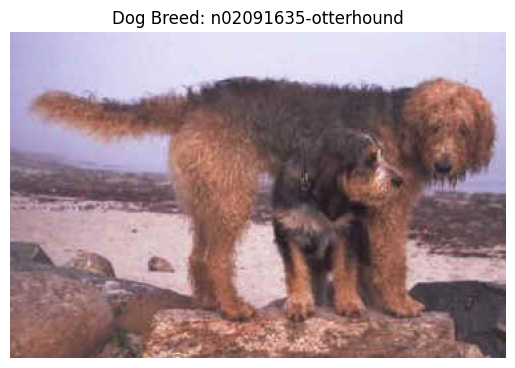

In [13]:
# Select a sample image and label from the DataFrame
sample_idx = 0  # Change this index to display different samples
sample_image_path = dog_data['dog_image_path'].iloc[sample_idx]  # Updated to 'dog_image_path'
sample_label = dog_data['label'].iloc[sample_idx]

# Load and display the image with its label
img = plt.imread(sample_image_path)
plt.imshow(img)
plt.axis('off')
plt.title(f"Dog Breed: {sample_label}")
plt.show()

In [14]:
# Print the number of unique dog breeds
num_unique_breeds = dog_data['label'].nunique()
print(f"Number of unique dog breeds: {num_unique_breeds}")

# Print the number of images for each breed
breed_counts = dog_data['label'].value_counts()
print("\nNumber of images for each dog breed:")
print(breed_counts)

Number of unique dog breeds: 120

Number of images for each dog breed:
label
n02085936-Maltese_dog             252
n02088094-Afghan_hound            239
n02092002-Scottish_deerhound      232
n02112018-Pomeranian              219
n02107683-Bernese_mountain_dog    218
                                 ... 
n02106382-Bouvier_des_Flandres    150
n02104029-kuvasz                  150
n02101556-clumber                 150
n02086079-Pekinese                149
n02090379-redbone                 148
Name: count, Length: 120, dtype: int64


# Load and Use Pre-trained Inception v3 Model

In [15]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


Step 1: Set Up the Inception v3 Model for Fine-Tuning

In [18]:
import torch
from torchvision import models, transforms, datasets
from PIL import Image
import torch.nn as nn
from torch.utils.data import DataLoader


# Load the pre-trained Inception v3 model
breed_model = models.inception_v3(pretrained=True) # load the inception v3 model with weights trained on the ImageNet dataset
breed_model.train()

# Number of dog breeds (classes)
num_classes = dog_data['label'].nunique()
# Modify the final fully connected layer to match the number of dog breeds
breed_model.fc = nn.Linear(breed_model.fc.in_features, num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
breed_model = breed_model.to(device)

/ext3/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/ext3/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Step 2: Prepare the Data Loaders for the Dog Dataset

In [19]:
# Define image transformations for training and validation
transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load the dataset using ImageFolder (make sure the data is structured for ImageFolder)
images_folder_path = os.path.join(dog_dataset_path, 'Images')
dog_dataset = datasets.ImageFolder(root=images_folder_path, transform=transform)
train_size = int(0.8 * len(dog_dataset))     # 80% for training
val_size = len(dog_dataset) - train_size    # 20% for validation
train_dataset, val_dataset = torch.utils.data.random_split(dog_dataset, [train_size, val_size])

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


Step 3: Set Up Training Loop for Fine-Tuning

In [20]:
import torch.optim as optim

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(breed_model.parameters(), lr=0.0001)

# Update the training function to handle Inception v3 outputs
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=5):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)

            # Extract the main output from InceptionOutputs
            if isinstance(outputs, tuple):  # For Inception v3, outputs is a tuple
                outputs = outputs[0]  # Only use the primary output for loss calculation

            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        # Calculate the training loss for this epoch
        epoch_loss = running_loss / len(train_loader.dataset)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

        # Validation
        validate_model(model, val_loader)

# Validation function (no changes needed here)
def validate_model(model, val_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)

            # Extract the main output
            if isinstance(outputs, tuple):  # For Inception v3, outputs is a tuple
                outputs = outputs[0]

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Validation Accuracy: {accuracy:.2f}%')
    model.train()


In [21]:
# Train the model for 5 epochs
num_epochs = 15

train_model(breed_model, train_loader, val_loader, criterion, optimizer, num_epochs=num_epochs)


Epoch [1/15], Loss: 1.8179
Validation Accuracy: 79.66%
Epoch [2/15], Loss: 0.5554
Validation Accuracy: 80.47%
Epoch [3/15], Loss: 0.2957
Validation Accuracy: 82.60%
Epoch [4/15], Loss: 0.1785
Validation Accuracy: 80.39%
Epoch [5/15], Loss: 0.1347
Validation Accuracy: 79.81%
Epoch [6/15], Loss: 0.1122
Validation Accuracy: 79.79%
Epoch [7/15], Loss: 0.1028
Validation Accuracy: 77.84%
Epoch [8/15], Loss: 0.0965
Validation Accuracy: 78.28%
Epoch [9/15], Loss: 0.0817
Validation Accuracy: 78.30%
Epoch [10/15], Loss: 0.0733
Validation Accuracy: 76.26%
Epoch [11/15], Loss: 0.0883
Validation Accuracy: 78.89%
Epoch [12/15], Loss: 0.0639
Validation Accuracy: 76.26%
Epoch [13/15], Loss: 0.0650
Validation Accuracy: 78.16%
Epoch [14/15], Loss: 0.0504
Validation Accuracy: 78.98%
Epoch [15/15], Loss: 0.0713
Validation Accuracy: 76.07%


Displaying one prediction:


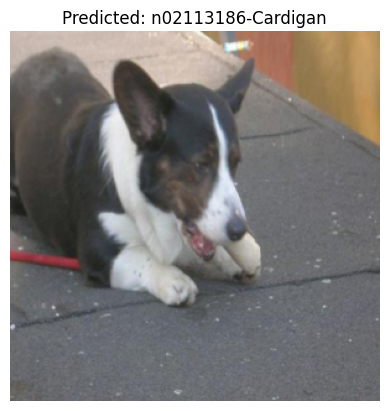

In [22]:
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

def show_single_prediction(model, dataset, class_names):
    """
    Display one image from the dataset with its predicted breed name.

    Args:
        model: The trained breed classification model.
        dataset: A dataset containing (image, label) pairs.
        class_names: A list of breed names corresponding to class indices.
    """
    # Set the model to evaluation mode
    model.eval()

    # Get one sample from the dataset
    image, true_label = dataset[0]  # Get the first sample
    image_tensor = image.unsqueeze(0).to(device)  # Add batch dimension and move to device

    with torch.no_grad():
        output = model(image_tensor)

        # Extract the main output if the model returns a tuple
        if isinstance(output, tuple):
            output = output[0]

        _, predicted_label = torch.max(output, 1)
        predicted_breed = class_names[predicted_label.item()]

    # Convert the tensor back to an image
    inv_transform = transforms.Compose([
        transforms.Normalize(mean=[-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225], std=[1 / 0.229, 1 / 0.224, 1 / 0.225]),
        transforms.ToPILImage()
    ])
    image = inv_transform(image)

    # Display the image with the predicted breed name
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_breed}")
    plt.show()

# Example usage
class_names = dog_dataset.classes  # Get breed names from ImageFolder
print("Displaying one prediction:")
show_single_prediction(breed_model, val_dataset, class_names)


# Link the Breed Model to an LSTM for Caption Generation

In [23]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


dataset

In [24]:
import os

# Define the base path to check
base_path = path  # This is your base directory path from KaggleHub download

# Recursively walk through the directory structure
for root, dirs, files in os.walk(base_path):
    level = root.replace(base_path, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for d in dirs:
        print(f"{subindent}{d}/")
    # Stop after the first few levels for readability
    if level >= 2:
        break

3/
    Flickr_Data/
    flickr_data/
    Flickr_Data/
        Flickr_Data/
        Flickr_Data/
            flickr8ktextfiles/
            Flickr_TextData/
            Images/


In [25]:
# Set the correct path to the Images folder based on directory structure
flickr_images_folder = os.path.join(path, 'flickr_data/Flickr_Data/Images')

# Verify if the Images folder path is correct
if not os.path.exists(flickr_images_folder):
    print(f"Error: Folder {flickr_images_folder} does not exist.")
else:
    # List a few files in the directory to confirm the path
    print("Listing files in Images folder:")
    print(os.listdir(flickr_images_folder)[:10])  # Display the first 10 files


Listing files in Images folder:
['3226254560_2f8ac147ea.jpg', '214543992_ce6c0d9f9b.jpg', '2366643786_9c9a830db8.jpg', '3368819708_0bfa0808f8.jpg', '2190227737_6e0bde2623.jpg', '2752809449_632cd991b3.jpg', '3097776588_312932e438.jpg', '1206506157_c7956accd5.jpg', '1319634306_816f21677f.jpg', '2465218087_fca77998c6.jpg']


In [26]:
import pandas as pd
import os

# Define the path to the captions file
captions_path = os.path.join(path, 'flickr_data/Flickr_Data/Flickr_TextData/Flickr8k.token.txt')

# Load the captions data
captions = pd.read_csv(captions_path, delimiter='\t', names=['image', 'caption'])

# Split the image filename from the caption index
captions['image'] = captions['image'].apply(lambda x: x.split('#')[0])

# Display the first few rows to confirm loading
print(captions.head())

# Number of unique images
unique_images = captions['image'].nunique()
print(f"Number of unique images: {unique_images}")

# Total number of captions
total_captions = len(captions)
print(f"Total number of captions: {total_captions}")

image_to_captions_mapping = captions.groupby('image')['caption'].apply(list).to_dict()


                       image  \
0  1000268201_693b08cb0e.jpg   
1  1000268201_693b08cb0e.jpg   
2  1000268201_693b08cb0e.jpg   
3  1000268201_693b08cb0e.jpg   
4  1000268201_693b08cb0e.jpg   

                                                                    caption  
0  A child in a pink dress is climbing up a set of stairs in an entry way .  
1                                     A girl going into a wooden building .  
2                          A little girl climbing into a wooden playhouse .  
3                      A little girl climbing the stairs to her playhouse .  
4                 A little girl in a pink dress going into a wooden cabin .  
Number of unique images: 8092
Total number of captions: 40460


In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Define the tokenizer and fit it on your captions data
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(captions['caption'].values)  # Assuming captions['caption'] contains the text data


2024-12-17 07:50:57.979857: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-17 07:51:00.174036: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734439861.073450    5412 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734439861.282652    5412 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-17 07:51:02.991426: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [28]:
# Combine datasets: Flickr8k captions and enriched Stanford Dogs captions
def combine_datasets(flickr_captions, dog_data):
    combined_data = []

    # Enrich Stanford Dogs dataset captions with breed names
    for idx, row in dog_data.iterrows():
        # Extract breed name by removing the 'n' identifier (e.g., 'n02091635-otterhound' -> 'otterhound')
        breed_name_with_id = row['label']
        breed_name = '-'.join(breed_name_with_id.split('-')[1:]).replace('_', ' ')  # Keep everything after the first '-'
        caption = f"A {breed_name} dog."
        combined_data.append({'image': row['dog_image_path'], 'caption': caption})

    # Add Flickr8k captions
    for idx, row in flickr_captions.iterrows():
        combined_data.append({'image': row['image'], 'caption': row['caption']})

    # Convert to DataFrame
    combined_captions = pd.DataFrame(combined_data)
    return combined_captions


# Call the function to combine datasets
combined_captions = combine_datasets(captions, dog_data)

# Display the first few rows of the combined dataset
print(combined_captions.head())


                                                                                                                                         image  \
0   /home/xw2641/.cache/kagglehub/datasets/jessicali9530/stanford-dogs-dataset/versions/2/images/Images/n02091635-otterhound/n02091635_965.jpg   
1  /home/xw2641/.cache/kagglehub/datasets/jessicali9530/stanford-dogs-dataset/versions/2/images/Images/n02091635-otterhound/n02091635_1329.jpg   
2  /home/xw2641/.cache/kagglehub/datasets/jessicali9530/stanford-dogs-dataset/versions/2/images/Images/n02091635-otterhound/n02091635_4698.jpg   
3  /home/xw2641/.cache/kagglehub/datasets/jessicali9530/stanford-dogs-dataset/versions/2/images/Images/n02091635-otterhound/n02091635_2120.jpg   
4   /home/xw2641/.cache/kagglehub/datasets/jessicali9530/stanford-dogs-dataset/versions/2/images/Images/n02091635-otterhound/n02091635_470.jpg   

             caption  
0  A otterhound dog.  
1  A otterhound dog.  
2  A otterhound dog.  
3  A otterhound dog.  
4  A ott

In [29]:
# Check if captions only contain dog names (Stanford Dogs dataset)
dog_captions = combined_captions[combined_captions['caption'].str.match(r"^A .+ dog\.$", na=False)]
print("Captions containing only dog breed names:")
print(dog_captions.head())

# Check for captions that are NOT in the format "A ... dog." (Flickr8k dataset)
non_dog_captions = combined_captions[~combined_captions['caption'].str.match(r"^A .+ dog\.$", na=False)]
print("\nCaptions that do not follow the 'A ... dog.' format (likely from Flickr8k):")
print(non_dog_captions.head())

# Display counts for both categories
print(f"\nTotal captions with only dog breed names: {len(dog_captions)}")
print(f"Total captions from Flickr8k dataset (or others): {len(non_dog_captions)}")


Captions containing only dog breed names:
                                                                                                                                         image  \
0   /home/xw2641/.cache/kagglehub/datasets/jessicali9530/stanford-dogs-dataset/versions/2/images/Images/n02091635-otterhound/n02091635_965.jpg   
1  /home/xw2641/.cache/kagglehub/datasets/jessicali9530/stanford-dogs-dataset/versions/2/images/Images/n02091635-otterhound/n02091635_1329.jpg   
2  /home/xw2641/.cache/kagglehub/datasets/jessicali9530/stanford-dogs-dataset/versions/2/images/Images/n02091635-otterhound/n02091635_4698.jpg   
3  /home/xw2641/.cache/kagglehub/datasets/jessicali9530/stanford-dogs-dataset/versions/2/images/Images/n02091635-otterhound/n02091635_2120.jpg   
4   /home/xw2641/.cache/kagglehub/datasets/jessicali9530/stanford-dogs-dataset/versions/2/images/Images/n02091635-otterhound/n02091635_470.jpg   

             caption  
0  A otterhound dog.  
1  A otterhound dog.  
2  A otterho

In [30]:
# Define the correct path to the Flickr8k Images folder
flickr_images_folder = os.path.join(path, 'flickr_data/Flickr_Data/Images')

# Update the image paths for Flickr8k captions
combined_captions['image'] = combined_captions['image'].apply(
    lambda x: os.path.join(flickr_images_folder, x) if x.endswith('.jpg') else x
)

# Check if paths are valid
missing_files = combined_captions[~combined_captions['image'].apply(os.path.exists)]
print(f"Number of missing files after updating paths: {len(missing_files)}")


Number of missing files after updating paths: 5


In [31]:
# Print the missing files after updating paths
print("Details of missing files after updating paths:")
print(missing_files[['image']].reset_index(drop=True))  # Reset index for cleaner display


Details of missing files after updating paths:
                         image
0  2258277193_586949ec62.jpg.1
1  2258277193_586949ec62.jpg.1
2  2258277193_586949ec62.jpg.1
3  2258277193_586949ec62.jpg.1
4  2258277193_586949ec62.jpg.1


In [32]:
# Print the missing files along with their captions
print("Details of missing files and their captions:")
print(missing_files[['image', 'caption']].reset_index(drop=True))


Details of missing files and their captions:
                         image  \
0  2258277193_586949ec62.jpg.1   
1  2258277193_586949ec62.jpg.1   
2  2258277193_586949ec62.jpg.1   
3  2258277193_586949ec62.jpg.1   
4  2258277193_586949ec62.jpg.1   

                                                 caption  
0                          people waiting for the subway  
1  Some people looking out windows in a large building .  
2         Three people are waiting on a train platform .  
3                   Three people standing at a station .  
4     two woman and one man standing near train tracks .  


In [33]:
# Filter out missing files
combined_captions = combined_captions[combined_captions['image'].apply(os.path.exists)].reset_index(drop=True)
print(f"Number of valid image-caption pairs after filtering: {len(combined_captions)}")


Number of valid image-caption pairs after filtering: 61035


In [34]:
from torchvision import transforms
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader

# Define image transformations for Flickr8k images
flickr_transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

class CombinedDataset(Dataset):
    def __init__(self, combined_captions, transform=None, tokenizer=None, max_caption_length=40):
        self.captions_df = combined_captions
        self.transform = transform
        self.tokenizer = tokenizer
        self.max_caption_length = max_caption_length

    def __len__(self):
        return len(self.captions_df)

    def __getitem__(self, idx):
        row = self.captions_df.iloc[idx]
        image_path = row['image']
        caption = row['caption']

        # Load image
        image = Image.open(image_path).convert("RGB")

        # Apply transformation
        if self.transform:
            image = self.transform(image)

        # Tokenize caption
        tokens = self.tokenizer.texts_to_sequences([caption])[0]
        if len(tokens) < self.max_caption_length:
            tokens += [0] * (self.max_caption_length - len(tokens))
        else:
            tokens = tokens[:self.max_caption_length]

        caption_tensor = torch.tensor(tokens, dtype=torch.long)
        return image, caption_tensor


In [35]:
# Tokenize combined captions
all_captions = combined_captions['caption'].tolist()
all_captions = [f"<start> {caption} <end>" for caption in all_captions]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)

# Add special tokens
if '<PAD>' not in tokenizer.word_index:
    tokenizer.word_index['<PAD>'] = 0
if '<start>' not in tokenizer.word_index:
    tokenizer.word_index['<start>'] = len(tokenizer.word_index) + 1
if '<end>' not in tokenizer.word_index:
    tokenizer.word_index['<end>'] = len(tokenizer.word_index) + 1

# Update tokenizer's index_word mapping
tokenizer.index_word = {v: k for k, v in tokenizer.word_index.items()}


In [36]:
batch_size=32
max_caption_length=40

In [37]:
from sklearn.model_selection import train_test_split

# Split combined dataset
train_data, val_data = train_test_split(combined_captions, test_size=0.2, random_state=42)

# Create datasets
train_dataset = CombinedDataset(train_data, transform=flickr_transform, tokenizer=tokenizer, max_caption_length=max_caption_length)
val_dataset = CombinedDataset(val_data, transform=flickr_transform, tokenizer=tokenizer, max_caption_length=max_caption_length)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)



In [38]:
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of validation batches: {len(val_loader)}")

Number of training batches: 1526
Number of validation batches: 382


In [39]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import torch
import torchvision.transforms as transforms

# Define the preprocessing for Inception v3
preprocess = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Feature extraction function
def extract_features(image_path, model):
    # Load and preprocess the image
    image = load_img(image_path, target_size=(299, 299))
    image = preprocess(image).unsqueeze(0)  # Add batch dimension

    # Ensure model is in evaluation mode and run inference
    model.eval()
    with torch.no_grad():
        feature_vector = model(image.to(device))  # Pass image to model and device
        if isinstance(feature_vector, tuple):  # For Inception v3, handle auxiliary outputs
            feature_vector = feature_vector[0]
    return feature_vector.cpu().numpy().flatten()  # Return as flattened numpy array

In [40]:
vocab_size = len(tokenizer.word_index) + 1  # Include padding


In [41]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Embedding, LSTM, Bidirectional, Dot, Activation, Lambda, Layer, concatenate
from tensorflow.keras.models import Model

# Custom layer to handle the attention context
class AttentionContext(Layer):
    def call(self, inputs):
        attention_scores, sequence_features = inputs
        return tf.einsum('ijk,ijl->ikl', attention_scores, sequence_features)

# Encoder model
inputs1 = Input(shape=(4096,))  # Example input size from image features
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
fe2_projected = tf.keras.layers.RepeatVector(max_caption_length)(fe2)
fe2_projected = Bidirectional(LSTM(256, return_sequences=True))(fe2_projected)

# Sequence feature layers
inputs2 = Input(shape=(max_caption_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)

# Remove the mask
se1 = Lambda(lambda x: x, mask=None)(se1)

se2 = Dropout(0.5)(se1)
se3 = Bidirectional(LSTM(256, return_sequences=True))(se2)

# Attention mechanism
attention = Dot(axes=[2, 2])([fe2_projected, se3])  # Calculate attention scores
attention_scores = Activation('softmax')(attention)  # Softmax on attention scores
attention_context = AttentionContext()([attention_scores, se3])
context_vector = Lambda(lambda x: tf.reduce_sum(x, axis=1))(attention_context)  # Sum along the time axis

# Decoder model
decoder_input = concatenate([context_vector, fe2], axis=-1)
decoder1 = Dense(256, activation='relu')(decoder_input)
outputs = Dense(vocab_size, activation='softmax')(decoder1)

# Create and compile the model
model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

print(model.summary())


I0000 00:00:1734439885.078512    5412 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 33708 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:00:04.0, compute capability: 8.0
W0000 00:00:1734439885.904747    7184 gpu_kernel_to_blob_pass.cc:190] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
W0000 00:00:1734439885.906285    7182 gpu_kernel_to_blob_pass.cc:190] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
W0000 00:00:1734439885.907872    7179 gpu_kernel_to_blob_pass.cc:190] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
W0000 00:00:1734439885.909372    7176 gpu_kernel_to_blob_pass.cc:190] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
W0000 00:00:1734439885.910925    7183 gpu_kernel_to_blob_pass.cc:190] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
W

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 4096)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 40)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 4096)      │          0 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 40, 256)   │  2,194,944 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 40)        │          0 │ input_layer_1[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │  1,048,832 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 40, 256)   │          0 │ embedding[0][0],  │
│                     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector       │ (None, 40, 256)   │          0 │ dense[0][0]       │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 40, 256)   │          0 │ lambda[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 40, 512)   │  1,050,624 │ repeat_vector[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 40, 512)   │  1,050,624 │ dropout_1[0][0]   │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot (Dot)           │ (None, 40, 40)    │          0 │ bidirectional[0]… │
│                     │                   │            │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 40, 40)    │          0 │ dot[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_context   │ (None, 40, 512)   │          0 │ activation[0][0], │
│ (AttentionContext)  │                   │            │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 512)       │          0 │ attention_contex… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 768)       │          0 │ lambda_1[0][0],   │
│ (Concatenate)       │                   │            │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │    196,864 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 8574)      │  2,203,518 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,745,406 (29.55 MB)

 Trainable params: 7,745,406 (29.55 MB)

 Non-trainable params: 0 (0.00 B)

None


### Load Pre-Trained Inception v3

In [42]:
# Load pre-trained Inception v3 model
feature_extractor = models.inception_v3(pretrained=True)

# Remove the final classification layer to get feature embeddings
feature_extractor.fc = nn.Identity()  # Replace the final fully connected layer with an identity layer

# Move the model to the appropriate device (GPU or CPU)
feature_extractor = feature_extractor.to(device)
feature_extractor.eval()  # Set to evaluation mode

/ext3/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/ext3/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

### Load Pre-Trained Inception v3

Epoch [1/15], Train Loss: 0.8462, Train Accuracy: 27.1941%
Validation Loss: 0.6558, Validation Accuracy: 36.4945%
Epoch [2/15], Train Loss: 0.5857, Train Accuracy: 39.5048%
Validation Loss: 0.5958, Validation Accuracy: 40.0514%
Epoch [3/15], Train Loss: 0.5100, Train Accuracy: 43.0447%
Validation Loss: 0.5700, Validation Accuracy: 41.4567%
Epoch [4/15], Train Loss: 0.4551, Train Accuracy: 46.2122%
Validation Loss: 0.5582, Validation Accuracy: 43.0907%
Epoch [5/15], Train Loss: 0.4113, Train Accuracy: 49.2413%
Validation Loss: 0.5562, Validation Accuracy: 43.2385%
Epoch [6/15], Train Loss: 0.3761, Train Accuracy: 52.2250%
Validation Loss: 0.5591, Validation Accuracy: 43.7704%
Epoch [7/15], Train Loss: 0.3469, Train Accuracy: 54.9895%
Validation Loss: 0.5630, Validation Accuracy: 44.1578%
Epoch [8/15], Train Loss: 0.3221, Train Accuracy: 57.3706%
Validation Loss: 0.5697, Validation Accuracy: 44.1250%
Epoch [9/15], Train Loss: 0.2992, Train Accuracy: 59.7262%
Validation Loss: 0.5784, Vali

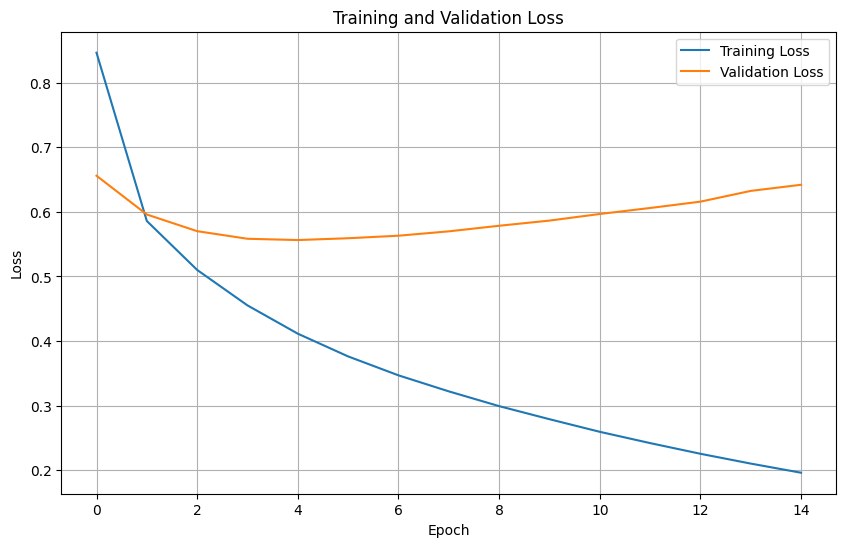

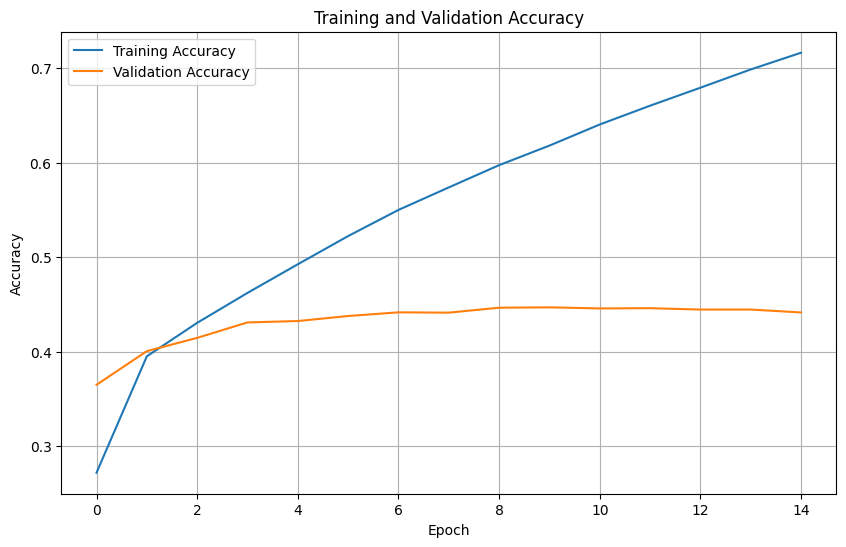

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import pandas as pd
import numpy as np
from PIL import Image
import os


# Define the LSTM-based decoder network for image captioning
class ImageCaptioningRNN(nn.Module):
    def __init__(self, feature_dim, breed_dim, embedding_dim, hidden_dim, vocab_size, num_layers=1):
        super(ImageCaptioningRNN, self).__init__()
        self.feature_dim = feature_dim
        self.breed_dim = breed_dim
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim + feature_dim + breed_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, image_features, breed_probabilities, captions):
        # Embed the captions (excluding the last token)
        embeddings = self.embedding(captions[:, :-1])
        
        # Concatenate image features with breed probabilities 
        combined_features = torch.cat((image_features, breed_probabilities), dim=1) # [batch_size, feature_dim + breed_dim] 
        combined_features = combined_features.unsqueeze(1).repeat(1, embeddings.size(1), 1) # Repeat for each time step
        
        # Concatenate combined features with embeddings
        inputs = torch.cat((combined_features, embeddings), dim=2)
        
        # Pass through the LSTM
        lstm_out, _ = self.lstm(inputs)
        
        # Generate predictions for each time step
        outputs = self.fc(lstm_out)
        return outputs

# Parameters
feature_dim = 2048    # Output size from Inception v3 before it wad 512
breed_dim = num_classes
embedding_dim = 256        # Dimension of word embeddings
hidden_dim = 512           # Dimension of LSTM hidden state
vocab_size = len(tokenizer.word_index) +1          # Vocabulary size from tokenizer
num_layers = 1             # Number of LSTM layers
num_epochs = 15         # Number of epochs to train the captioning model
learning_rate = 0.001      # Learning rate for optimizer

# Instantiate the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
caption_model = ImageCaptioningRNN(feature_dim, breed_dim, embedding_dim, hidden_dim, vocab_size, num_layers).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(caption_model.parameters(), lr=learning_rate)

# Accuracy calculation for breed classifier
def calculate_breed_accuracy(feature_extractor, data_loader):
    feature_extractor.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = feature_extractor(images)
            if isinstance(outputs, tuple):
                outputs = outputs[0]
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f"Breed Classification Accuracy: {accuracy:.2f}%")
    return accuracy

# Accuracy calculation for image captioning model
def calculate_captioning_accuracy(model, feature_extractor, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, captions in data_loader:
            images, captions = images.to(device), captions.to(device)
            image_features = feature_extractor(images)
            if isinstance(image_features, tuple):
                image_features = image_features[0]
            outputs = model(image_features, captions)
            outputs = outputs.argmax(dim=-1)  # Get predicted token indices
            targets = captions[:, 1:]  # Exclude the start token
            correct += (outputs == targets).sum().item()
            total += targets.numel()
    accuracy = 100 * correct / total
    print(f"Captioning Model Accuracy: {accuracy:.2f}%")
    return accuracy

def validate_captioning_model(model, feature_extractor, breed_classifier, val_loader, criterion, vocab_size, pad_idx):
    model.eval()
    feature_extractor.eval()
    breed_classifier.eval()

    running_loss = 0.0
    total_correct = 0
    total_tokens = 0

    with torch.no_grad():
        for images, captions in val_loader:
            images, captions = images.to(device), captions.to(device)

            # Extract image features and breed probabilities
            image_features = feature_extractor(images)
            if isinstance(image_features, tuple):
                image_features = image_features[0]
            breed_probabilities = breed_classifier(images).softmax(dim=1)

            # Forward pass
            outputs = model(image_features, breed_probabilities, captions)

            # Reshape outputs and targets for loss calculation
            outputs = outputs.reshape(-1, vocab_size)
            targets = captions[:, 1:].reshape(-1)

            # Compute loss
            loss = criterion(outputs, targets)
            running_loss += loss.item() * images.size(0)

            # Calculate accuracy
            predicted_tokens = torch.argmax(outputs, dim=1)
            non_pad_mask = targets != pad_idx  # Exclude padding tokens
            correct_predictions = (predicted_tokens == targets) & non_pad_mask
            total_correct += correct_predictions.sum().item()
            total_tokens += non_pad_mask.sum().item()

    val_loss = running_loss / len(val_loader.dataset)
    val_accuracy = total_correct / total_tokens if total_tokens > 0 else 0.0

    return val_loss, val_accuracy

# Plot metrics
def plot_metrics(train_losses, val_losses, title):
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label="Training Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()


def train_captioning_model(model, feature_extractor, breed_classifier, train_loader, val_loader, criterion, optimizer, num_epochs, vocab_size, pad_idx):
    model.train()
    feature_extractor.eval()  # Set the feature extractor (Inception v3) to evaluation mode
    breed_classifier.eval()

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        # Training phase
        running_loss = 0.0
        total_correct = 0
        total_tokens = 0

        for images, captions in train_loader:
            images, captions = images.to(device), captions.to(device)
            optimizer.zero_grad()

            # Extract image features from Inception v3
            with torch.no_grad():
                image_features = feature_extractor(images)
                if isinstance(image_features, tuple):  # For Inception v3, outputs is a tuple
                    image_features = image_features[0]

                # Get breed probabilities
                breed_probabilities = breed_classifier(images).softmax(dim=1)

            # Forward pass through the captioning model
            outputs = model(image_features, breed_probabilities, captions)

            # Reshape outputs and targets for calculating loss
            outputs = outputs.reshape(-1, vocab_size)
            targets = captions[:, 1:].reshape(-1)

            # Compute the loss
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

            # Calculate accuracy
            predicted_tokens = torch.argmax(outputs, dim=1)
            non_pad_mask = targets != pad_idx  # Ignore padding tokens
            correct_predictions = (predicted_tokens == targets) & non_pad_mask
            total_correct += correct_predictions.sum().item()
            total_tokens += non_pad_mask.sum().item()

        train_epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(train_epoch_loss)

        train_epoch_accuracy = total_correct / total_tokens if total_tokens > 0 else 0.0
        train_accuracies.append(train_epoch_accuracy)

        print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_epoch_loss:.4f}, Train Accuracy: {train_epoch_accuracy:.4%}") 
        
        # Validation phase
        val_epoch_loss, val_epoch_accuracy = validate_captioning_model(
            model, feature_extractor, breed_classifier, val_loader, criterion, vocab_size, pad_idx) 
        val_losses.append(val_epoch_loss) 
        val_accuracies.append(val_epoch_accuracy)

        print(f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_accuracy:.4%}") 
        
        model.train()  # Return to training mode
        
    return train_losses, val_losses, train_accuracies, val_accuracies


def plot_accuracy(train_accuracies, val_accuracies, title="Training and Validation Accuracy"):
    plt.figure(figsize=(10, 6))
    plt.plot(train_accuracies, label="Training Accuracy")
    plt.plot(val_accuracies, label="Validation Accuracy")
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

# Define pad index
pad_idx = tokenizer.word_index['<PAD>']

train_losses, val_losses, train_epoch_accuracy, val_epoch_accuracy = train_captioning_model(
    caption_model,
    feature_extractor,
    breed_model,
    train_loader,
    val_loader,
    criterion,
    optimizer,
    num_epochs,
    vocab_size,
    pad_idx
)


# Plot metrics
plot_metrics(train_losses, val_losses, "Training and Validation Loss")
plot_accuracy(train_epoch_accuracy, val_epoch_accuracy, "Training and Validation Accuracy")

# Evaluate captioning model accuracy
#calculate_captioning_accuracy(caption_model, breed_model, flickr_loader)

In [44]:
for i in val_loader:
    print(i)
    break

[tensor([[[[ 1.0673,  0.7591,  0.9132,  ...,  0.6734,  0.7077,  0.7077],
          [ 1.5982,  0.8789,  0.9303,  ...,  0.5536,  0.7077,  0.7933],
          [ 1.8550,  0.9132,  0.7762,  ...,  0.4166,  0.5364,  0.6049],
          ...,
          [-1.5357, -1.4329, -1.1932,  ..., -1.6898, -1.6555, -1.8097],
          [-1.2617, -1.1075, -1.1760,  ..., -1.9124, -1.8097, -1.6042],
          [-1.3473, -1.2103, -1.1589,  ..., -1.9467, -1.8097, -1.6042]],

         [[ 0.6429,  0.1527,  0.3452,  ...,  0.0651,  0.1352,  0.1702],
          [ 1.3256,  0.2927,  0.3803,  ..., -0.0049,  0.1702,  0.2577],
          [ 1.7633,  0.4153,  0.2402,  ..., -0.0924,  0.0126,  0.0651],
          ...,
          [-1.5805, -1.4930, -1.2479,  ..., -1.6681, -1.6331, -1.7731],
          [-1.3354, -1.1779, -1.2479,  ..., -1.8782, -1.7731, -1.5805],
          [-1.4230, -1.3004, -1.2479,  ..., -1.9482, -1.7556, -1.5980]],

         [[ 0.4265, -0.3230, -0.1312,  ..., -0.3927, -0.3055, -0.3230],
          [ 1.3328, -0.1487, 

# Validation on Separate Data

In [45]:
from torch.utils.data import DataLoader
import pandas as pd

def separate_validation_set(val_loader, tokenizer, word='dog'):
    """
    Separate the validation set into captions with and without a specific word.

    Args:
        val_loader (DataLoader): DataLoader containing (image, caption) pairs.
        tokenizer (Tokenizer): Tokenizer object with word_index mapping.
        word (str): The word to check for in the captions (default is 'dog').

    Returns:
        with_word (list): Subset of data where captions contain the word.
        without_word (list): Subset of data where captions do not contain the word.
    """
    word_token = tokenizer.word_index.get(word)
    if word_token is None:
        raise ValueError(f"The word '{word}' is not in the tokenizer vocabulary.")

    with_word = []
    without_word = []
    
    # Iterate over the val_loader
    for images, captions in val_loader:
        for image, caption in zip(images, captions):
            if word_token in caption:
                with_word.append((image, caption))
            else:
                without_word.append((image, caption))

    return with_word, without_word


# Assuming the val_loader, tokenizer, and pretrained model are already defined:
with_dog, without_dog = separate_validation_set(val_loader, tokenizer, word='dog')

from torch.utils.data import DataLoader, Dataset

class CustomDataset(Dataset):
    def __init__(self, data):
        """
        Args:
            data (list of tuples): List containing (image, caption) pairs.
        """
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]  # Return the (image, caption) pair directly


# Directly create DataLoaders from `with_dog` and `without_dog`
with_dog_loader = DataLoader(
    dataset=CustomDataset(with_dog),  # Use the CustomDataset wrapper
    batch_size=batch_size,
    shuffle=True,
    num_workers=2,
    drop_last=False
)

without_dog_loader = DataLoader(
    dataset=CustomDataset(without_dog),  # Use the CustomDataset wrapper
    batch_size=batch_size,
    shuffle=True,
    num_workers=2,
    drop_last=False
)

# Example usage
print("Loader with dog:")
for images, captions in with_dog_loader:
    print("Images batch:", images)
    print("Captions batch:", captions)
    break

print("\nLoader without dog:")
for images, captions in without_dog_loader:
    print("Images batch:", images)
    print("Captions batch:", captions)
    break


Loader with dog:
Images batch: tensor([[[[-0.3712,  0.1254,  0.5536,  ...,  2.1975,  2.1975,  2.1975],
          [-0.3712, -0.7308, -0.6109,  ...,  2.1975,  2.1975,  2.1975],
          [-0.4054, -0.5424, -0.5253,  ...,  2.1975,  2.1975,  2.1975],
          ...,
          [ 0.6563,  0.6392,  0.7077,  ...,  0.6734,  0.6734,  0.6221],
          [ 0.6734,  0.6392,  0.6392,  ...,  0.6392,  0.7077,  0.6734],
          [ 0.6734,  0.5536,  0.4337,  ...,  0.5193,  0.5878,  0.6392]],

         [[ 0.1527,  0.6429,  1.0105,  ...,  2.1660,  2.1660,  2.1835],
          [ 0.2577, -0.1275, -0.0749,  ...,  2.1485,  2.1485,  2.1660],
          [ 0.3102,  0.1176,  0.1176,  ...,  2.1310,  2.1310,  2.1310],
          ...,
          [ 0.7654,  0.7654,  0.8354,  ...,  0.8880,  0.8704,  0.7829],
          [ 0.8179,  0.7829,  0.7829,  ...,  0.9230,  0.9755,  0.9230],
          [ 0.8179,  0.6954,  0.5728,  ...,  0.8004,  0.8704,  0.9055]],

         [[-1.6824, -1.2293, -0.7238,  ...,  2.1868,  2.1171,  2.0823],

In [46]:
for i in with_dog:
    print(i)
    break

(tensor([[[ 1.0673,  0.7591,  0.9132,  ...,  0.6734,  0.7077,  0.7077],
         [ 1.5982,  0.8789,  0.9303,  ...,  0.5536,  0.7077,  0.7933],
         [ 1.8550,  0.9132,  0.7762,  ...,  0.4166,  0.5364,  0.6049],
         ...,
         [-1.5357, -1.4329, -1.1932,  ..., -1.6898, -1.6555, -1.8097],
         [-1.2617, -1.1075, -1.1760,  ..., -1.9124, -1.8097, -1.6042],
         [-1.3473, -1.2103, -1.1589,  ..., -1.9467, -1.8097, -1.6042]],

        [[ 0.6429,  0.1527,  0.3452,  ...,  0.0651,  0.1352,  0.1702],
         [ 1.3256,  0.2927,  0.3803,  ..., -0.0049,  0.1702,  0.2577],
         [ 1.7633,  0.4153,  0.2402,  ..., -0.0924,  0.0126,  0.0651],
         ...,
         [-1.5805, -1.4930, -1.2479,  ..., -1.6681, -1.6331, -1.7731],
         [-1.3354, -1.1779, -1.2479,  ..., -1.8782, -1.7731, -1.5805],
         [-1.4230, -1.3004, -1.2479,  ..., -1.9482, -1.7556, -1.5980]],

        [[ 0.4265, -0.3230, -0.1312,  ..., -0.3927, -0.3055, -0.3230],
         [ 1.3328, -0.1487, -0.1138,  ..., -

In [47]:
def evaluate_captioning_model(model, feature_extractor, breed_classifier, data_loader, criterion, vocab_size, pad_idx):

    """
    Evaluate the captioning model on a specific subset of data.

    Args:
        model: The trained captioning model.
        feature_extractor: The feature extractor model (e.g., Inception v3).
        data_loader: DataLoader containing the evaluation subset.
        criterion: Loss function used for evaluation.
        vocab_size: Size of the vocabulary.
        pad_idx: Index of the padding token in the tokenizer.

    Returns:
        eval_loss: Average loss over the evaluation subset.
        eval_accuracy: Accuracy over the evaluation subset.
    """
    model.eval()
    feature_extractor.eval()
    breed_classifier.eval()

    running_loss = 0.0
    total_correct = 0
    total_tokens = 0

    with torch.no_grad():
        for images, captions in data_loader:
            images, captions = images.to(device), captions.to(device)

            # Extract image features
            image_features = feature_extractor(images)
            if isinstance(image_features, tuple):  # For models like Inception v3
                image_features = image_features[0]
            # Get breed probabilities
            breed_probabilities = breed_classifier(images).softmax(dim=1)

            # Forward pass through the captioning model
            outputs = model(image_features, breed_probabilities, captions)

            # Reshape outputs and targets for calculating loss
            outputs = outputs.reshape(-1, vocab_size)
            targets = captions[:, 1:].reshape(-1)

            # Compute loss
            loss = criterion(outputs, targets)
            running_loss += loss.item() * images.size(0)

            # Calculate accuracy
            predicted_tokens = torch.argmax(outputs, dim=1)
            non_pad_mask = targets != pad_idx  # Exclude padding tokens
            correct_predictions = (predicted_tokens == targets) & non_pad_mask
            total_correct += correct_predictions.sum().item()
            total_tokens += non_pad_mask.sum().item()

    eval_loss = running_loss / len(data_loader.dataset)
    eval_accuracy = total_correct / total_tokens if total_tokens > 0 else 0.0

    return eval_loss, eval_accuracy


# Evaluate on `with_dog_loader`
print("Evaluating on subset with 'dog':")
with_dog_loss, with_dog_accuracy = evaluate_captioning_model(
    caption_model,
    feature_extractor,
    breed_model, 
    with_dog_loader, 
    criterion, 
    vocab_size, 
    pad_idx
)

# Evaluate on `without_dog_loader`
print("\nEvaluating on subset without 'dog':")
without_dog_loss, without_dog_accuracy = evaluate_captioning_model(
    caption_model, 
    feature_extractor,
    breed_model, 
    without_dog_loader, 
    criterion, 
    vocab_size, 
    pad_idx
)

# Print summary
print("\nEvaluation Results:")
print(f"With 'dog': Loss = {with_dog_loss:.4f}, Accuracy = {with_dog_accuracy:.2%}")
print(f"Without 'dog': Loss = {without_dog_loss:.4f}, Accuracy = {without_dog_accuracy:.2%}")


Evaluating on subset with 'dog':

Evaluating on subset without 'dog':

Evaluation Results:
With 'dog': Loss = 0.2193, Accuracy = 66.89%
Without 'dog': Loss = 0.9993, Accuracy = 34.87%


# Blue

In [48]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [49]:
from nltk.translate.bleu_score import sentence_bleu,SmoothingFunction

def calculate_bleu(predicted_caption, reference_captions):
    """
    Calculate BLEU score for a single predicted caption.
    Args:
        predicted_caption: List of predicted tokens.
        reference_captions: List of lists of reference tokens.
    Returns:
        bleu_score: BLEU score for the predicted caption.
    """
    smoothing_function = SmoothingFunction().method1
    return sentence_bleu(reference_captions, predicted_caption,smoothing_function=smoothing_function)

def evaluate_captioning_with_bleu(model, feature_extractor, breed_classifier, data_loader, pad_idx):
    """
    Evaluate the captioning model using BLEU score.
    Args:
        model: The trained captioning model.
        feature_extractor: The feature extractor model (e.g., Inception v3).
        data_loader: DataLoader containing the evaluation subset.
        pad_idx: Index of the padding token in the tokenizer.
    Returns:
        avg_bleu_score: Average BLEU score over the evaluation subset.
    """
    model.eval()
    feature_extractor.eval()

    total_bleu_score = 0.0
    num_samples = 0

    with torch.no_grad():
        for images, captions in data_loader:
            images, captions = images.to(device), captions.to(device)

            # Extract image features
            image_features = feature_extractor(images)
            if isinstance(image_features, tuple):  # For models like Inception v3
                image_features = image_features[0]

            # Get breed probabilities
            breed_probabilities = breed_classifier(images).softmax(dim=1)

            # Forward pass through the captioning model
            outputs = model(image_features, breed_probabilities, captions)

            # Generate predictions
            predicted_tokens = torch.argmax(outputs, dim=2)  # Sequence-level prediction
            for i in range(len(predicted_tokens)):
                pred_caption = [token for token in predicted_tokens[i].tolist() if token != pad_idx]
                ref_captions = [[token for token in ref.tolist() if token != pad_idx] for ref in captions[i:i+1]]
                
                # Calculate BLEU for this sample
                total_bleu_score += calculate_bleu(pred_caption, ref_captions)
                num_samples += 1

    avg_bleu_score = total_bleu_score / num_samples if num_samples > 0 else 0.0
    return avg_bleu_score

# Evaluate on `with_dog_loader`
print("Evaluating on subset with 'dog':")
with_dog_bleu = evaluate_captioning_with_bleu(
    caption_model, 
    feature_extractor,
    breed_model,  
    with_dog_loader, 
    pad_idx
)

# Evaluate on `without_dog_loader`
print("\nEvaluating on subset without 'dog':")
without_dog_bleu = evaluate_captioning_with_bleu(
    caption_model, 
    feature_extractor,
    breed_model, 
    without_dog_loader, 
    pad_idx
)

# Print summary
print("\nEvaluation Results:")
print(f"With 'dog': BLEU Score = {with_dog_bleu:.4f}")
print(f"Without 'dog': BLEU Score = {without_dog_bleu:.4f}")


Evaluating on subset with 'dog':

Evaluating on subset without 'dog':

Evaluation Results:
With 'dog': BLEU Score = 0.2941
Without 'dog': BLEU Score = 0.0802


# Visualize

Displaying results from 'with_dog_loader':


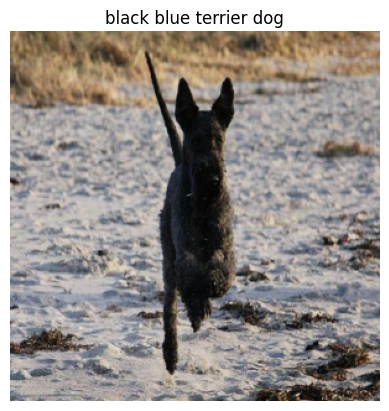

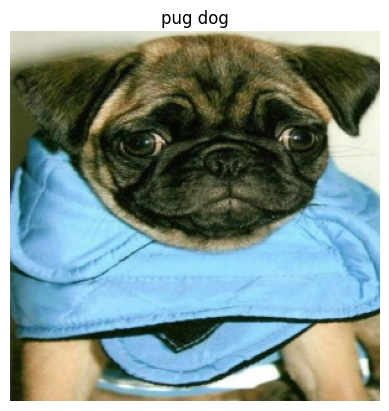

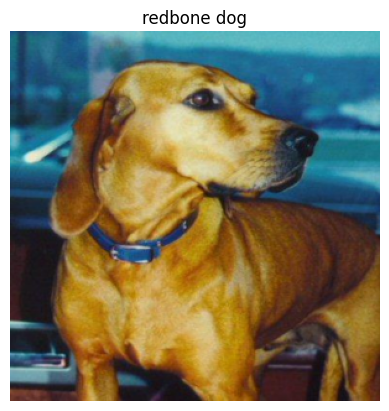


Displaying results from 'without_dog_loader':


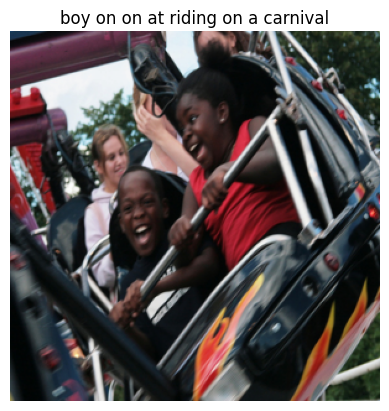

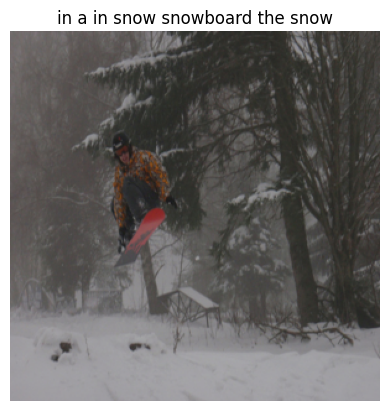

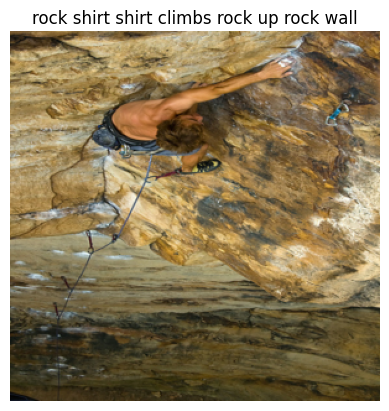

In [50]:
import matplotlib.pyplot as plt
import torchvision.transforms as T

# Function to decode a tokenized caption into text
def decode_caption(caption_tensor, tokenizer):
    """
    Decode a tokenized caption tensor into a human-readable string.

    Args:
        caption_tensor (torch.Tensor): The tokenized caption (1D tensor).
        tokenizer: The tokenizer with a word_index and index_word mapping.

    Returns:
        str: The decoded caption as a string.
    """
    # Ensure the tokenizer has a reverse mapping
    index_word = {index: word for word, index in tokenizer.word_index.items()}
    decoded_caption = [index_word.get(token.item(), '<UNK>') for token in caption_tensor if token.item() != 0]
    return " ".join(decoded_caption)


def get_predict_caption(model, feature_extractor, breed_classifier, image_tensor, caption_tensor, tokenizer):
    model.eval()
    feature_extractor.eval()
    breed_classifier.eval()

    with torch.no_grad():
        
        image_tensor = image_tensor.unsqueeze(0).to(device)
        caption_tensor = caption_tensor.unsqueeze(0).to(device)

        # Extract image features
        image_features = feature_extractor(image_tensor)
        if isinstance(image_features, tuple):  # For models like Inception v3
            image_features = image_features[0]

        # Get breed probabilities
        breed_probabilities = breed_classifier(image_tensor).softmax(dim=1)

        # Forward pass through the captioning model
        outputs = model(image_features, breed_probabilities, caption_tensor)

        # Generate predictions
        predicted_tokens = torch.argmax(outputs, dim=2).squeeze(0)  # Sequence-level prediction
        predicted_caption = decode_caption(predicted_tokens,tokenizer)
    return predicted_caption


# Show a few examples from the DataLoader
def display_results(data_loader, model, feature_extractor, breed_classifier, tokenizer, num_examples=5):
    """
    Display a few examples from a DataLoader, including images and decoded captions.

    Args:
        data_loader (DataLoader): The DataLoader containing (image, caption) pairs.
        tokenizer: The tokenizer to decode captions.
        num_examples (int): The number of examples to display.
    """
    model.eval()
    feature_extractor.eval()
    breed_classifier.eval()
    for i, (images, captions) in enumerate(data_loader):  # Only unpack images and captions
       
        for image_tensor, caption_tensor in zip(images, captions):
            # Decode the caption
            caption_text = get_predict_caption(caption_model, feature_extractor, breed_model, image_tensor, caption_tensor, tokenizer)

            # Convert image tensor back to PIL Image
            inv_transform = T.Compose([
                T.Normalize(mean=[-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225], std=[1 / 0.229, 1 / 0.224, 1 / 0.225]),
                T.ToPILImage()
            ])
            image = inv_transform(image_tensor.cpu())

            # Display the image with its caption
            plt.imshow(image)
            plt.axis('off')
            plt.title(caption_text)
            plt.show()

            num_examples -= 1
            if num_examples == 0:
                return



print("Displaying results from 'with_dog_loader':")
display_results(with_dog_loader, caption_model, feature_extractor,breed_model, tokenizer, num_examples=3)

print("\nDisplaying results from 'without_dog_loader':")
display_results(without_dog_loader, caption_model, feature_extractor,breed_model, tokenizer, num_examples=3)